In [1]:
import os
import pandas as pd
import datetime
from sqlalchemy import *
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy.orm import sessionmaker
import login_mysql
mydb, cursor = login_mysql.login()

### 1. 브리핑

In [15]:
# 채널별별 구독자수 현황 및 증감

In [10]:
qry1 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry1)
rlt1 = cursor.fetchall()

rlt1 = pd.DataFrame(rlt1)


In [13]:
qry2 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Subscribe
	, c.Prev_Sub
	, c.Subscribe - c.Prev_Sub as diff_sub
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer) as Subscribe
		, LAG(CAST(REPLACE(a.Subscrib_counts, 'hidden', 0) AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Sub
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY diff_sub DESC;

"""
cursor.execute(qry2)
rlt2 = cursor.fetchall()

rlt2 = pd.DataFrame(rlt2)

#### 1) 인플루언서채널 구독자 현황

In [11]:
rlt1
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,MOCAR,2021-06-11,569000,566000,3000
1,MOTline,2021-06-11,474000,472000,2000
2,자동차의모든것,2021-06-11,256000,254000,2000
3,Auto View,2021-06-11,213000,212000,1000
4,NOBOSSINDUSTRY,2021-06-11,236000,235000,1000
5,Woopa TV,2021-06-11,626000,625000,1000
6,CARLAB,2021-06-11,67600,67400,200
7,Auto Press,2021-06-11,175000,175000,0
8,Motograph,2021-06-11,350000,350000,0


- 6월11일자는 크롤링 결과 이전일(6월4일) 대비 구독자수 3천명 증가
- 내가 구독하고 있는 인플루언서 채널 중 MOCAR, MOTline, 자동차의 모든것 등의 구독자수 증가
- 가장 구독자가 많은 채널이 아닌데 왜 늘었을까?

In [14]:
rlt2
# Subscribe: 구독자수
# Prev_Suv: 이전일 구독자수
# diff_sub : 구독자증가감소

,Brand,Timestamp,Subscribe,Prev_Sub,diff_sub
0,Jeep,2021-06-11,16000,15700,300
1,renaultsamsungM,2021-06-11,11000,10800,200
2,BMW,2021-06-11,31700,31600,100
3,TOYOTA,2021-06-11,11300,11200,100
4,VOLVO,2021-06-11,2080,2070,10
5,FORD,2021-06-11,413,412,1
6,KIA,2021-06-11,128000,128000,0
7,LEXUS,2021-06-11,10400,10400,0
8,HYUNDAI,2021-06-11,0,0,0
9,Mercedes-Benz,2021-06-11,1650000,1650000,0


- 브랜드채널의 경우 지프, 르노삼성, BMW의 구독자 증가가 눈에 보임

In [18]:
# 채널별별 조회수 현황 및 증감

In [19]:
qry3 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry3)
rlt3 = cursor.fetchall()

rlt3 = pd.DataFrame(rlt3)

In [25]:
qry4 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.View
	, c.Prev_View
	, c.View - c.Prev_View as dff_View
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.View_counts AS signed integer) as View
		, LAG(CAST(a.View_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_View
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_View DESC;


"""
cursor.execute(qry4)
rlt4 = cursor.fetchall()

rlt4 = pd.DataFrame(rlt4)

In [22]:
rlt3
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,MOTline,2021-06-11,156866993,154191416,2675577
1,MOCAR,2021-06-11,238264656,235950897,2313759
2,Woopa TV,2021-06-11,313286045,311512442,1773603
3,NOBOSSINDUSTRY,2021-06-11,83913203,83413932,499271
4,Auto View,2021-06-11,65870901,65453251,417650
5,자동차의모든것,2021-06-11,72302001,71899729,402272
6,Motograph,2021-06-11,226969072,226647622,321450
7,Auto Press,2021-06-11,120373129,120116941,256188
8,CARLAB,2021-06-11,36237015,36128532,108483


- 구독자는 MOCAR가 가장 많이 늘었지만, 조회수는 MOTline이 가장 많이 늘었음
- 기존 구독자수가 많은 WoopaTV가 조회수에는 3위를 기록함

In [26]:
rlt4
# View : 조회수
# Pre_Vidw : 전일조회수
# dff_View : 전일 대비 조회수 증감

,Brand,Timestamp,View,Prev_View,dff_View
0,KIA,2021-06-11,376527633,374988464,1539169
1,renaultsamsungM,2021-06-11,68501696,67637366,864330
2,TOYOTA,2021-06-11,78535422,77849362,686060
3,Mercedes-Benz,2021-06-11,307851865,307284973,566892
4,LEXUS,2021-06-11,50598992,50240553,358439
5,SsangyongMotor,2021-06-11,67139514,66912255,227259
6,HYUNDAI,2021-06-11,265985471,265855103,130368
7,Jeep,2021-06-11,36617622,36546141,71481
8,FORD,2021-06-11,622395,614179,8216
9,BMW,2021-06-11,118527544,118521448,6096


- 브랜드 채널의 경우 광고를 통한 조회수 증가분이 큰 영역
- KIA, 르노삼성, TOYOTA, Benz, 렉서스, 쌍용, 현대자동차에서 10k이상의 조회수 증가분 있음
- 이들 광고주들이 현시점 광고 열심히 한다는 의미로 상황 파악 가능

In [28]:
# 채널별별 신규동영상 수 현황 및 증감

In [32]:
qry5 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Influencer') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry5)
rlt5 = cursor.fetchall()

rlt5 = pd.DataFrame(rlt5)

In [33]:
qry6 = """

SELECT 
	c.Brand
	, c.Timestamp
	, c.Video_cnt
	, c.Prev_Vcnt
	, c.Video_cnt - c.Prev_Vcnt as dff_Video
FROM
	(SELECT
		b.Brand
		, date(a.Timestamp) as Timestamp
		, CAST(a.Video_counts AS signed integer) as Video_cnt
		, LAG(CAST(a.Video_counts AS signed integer)) 
	 	 OVER(ORDER BY b.brand, a.Timestamp ASC) as Prev_Vcnt
	FROM Fact_channelResponse a
	LEFT JOIN dim_ch b
	ON a.Channel_Id = b.Channel_Id
	WHERE 
		Channel_genre = 'Brand') c
WHERE c.Timestamp = '20210611'
ORDER BY dff_Video DESC;

"""
cursor.execute(qry6)
rlt6 = cursor.fetchall()

rlt6 = pd.DataFrame(rlt6)

In [36]:
rlt5
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,MOTline,2021-06-11,736,726,10
1,MOCAR,2021-06-11,1067,1057,10
2,Woopa TV,2021-06-11,862,852,10
3,NOBOSSINDUSTRY,2021-06-11,843,835,8
4,CARLAB,2021-06-11,989,983,6
5,Auto Press,2021-06-11,1959,1956,3
6,Auto View,2021-06-11,450,447,3
7,Motograph,2021-06-11,1980,1977,3
8,자동차의모든것,2021-06-11,623,621,2


In [35]:
rlt6
# 6월 4일 ~ 11일 사이에 등록된 신규등록수들

,Brand,Timestamp,Video_cnt,Prev_Vcnt,dff_Video
0,TOYOTA,2021-06-11,309,301,8
1,HYUNDAI,2021-06-11,3040,3035,5
2,KIA,2021-06-11,1331,1328,3
3,Mercedes-Benz,2021-06-11,1945,1942,3
4,BMW,2021-06-11,170,169,1
5,LEXUS,2021-06-11,187,186,1
6,AUDI,2021-06-11,122,121,1
7,SsangyongMotor,2021-06-11,689,689,0
8,FORD,2021-06-11,37,37,0
9,VolkswagenKorea,2021-06-11,132,132,0


- 토요타, 현대차, 기아차, 벤츠까지 신규 영상등록하면서 광고시작한듯 보임

### 2. 브랜드별 채널현황

In [45]:
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

f_path = 'c:/Windows/Fonts/malgun.ttf'

font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font', family=font_name)

In [3]:
# 브랜드채널별 일별조회수 및 예상광고비

In [37]:
# Brand : TOYOTA

In [38]:
qry7 = """

SELECT
 c.Video_title 
 ,sum((c.views-c.prev_views)) as sum_views
 ,sum((c.views-c.prev_views) * 40) as ex_cost -- CPV : 40원적용
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'TOYOTA') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
GROUP BY c.Video_title
ORDER BY ex_cost DESC

"""
cursor.execute(qry7)
rlt7 = cursor.fetchall()

rlt7 = pd.DataFrame(rlt7)

In [57]:
rlt7 = rlt7.astype(
        {'Video_title' : str,
         'sum_views' : int,
         'ex_cost' : int     
        })

In [110]:
rlt7.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Video_title  45 non-null     object
 1   sum_views    45 non-null     int32 
 2   ex_cost      45 non-null     int32 
dtypes: int32(2), object(1)
memory usage: 848.0+ bytes


In [58]:
rlt7[:9].sum()

Video_title    캠리 하이브리드 런칭(XLE Launching 15초 ver.)캠리 하이브리드 런칭...
sum_views                                                1986265
ex_cost                                                 79450600
dtype: object

- 토요타는 6월5일 이후 상기의 동영상에서 조회수를 기록 중임
- 토요타는 기간 중 총 8억상당의 광고비 투여하여 총 1,986,265 view 기록
- 캠리 하이브리드 XLS, XSE 광고로 약 130만views를 얻었음

Text(0, 0.5, '예상광고비')

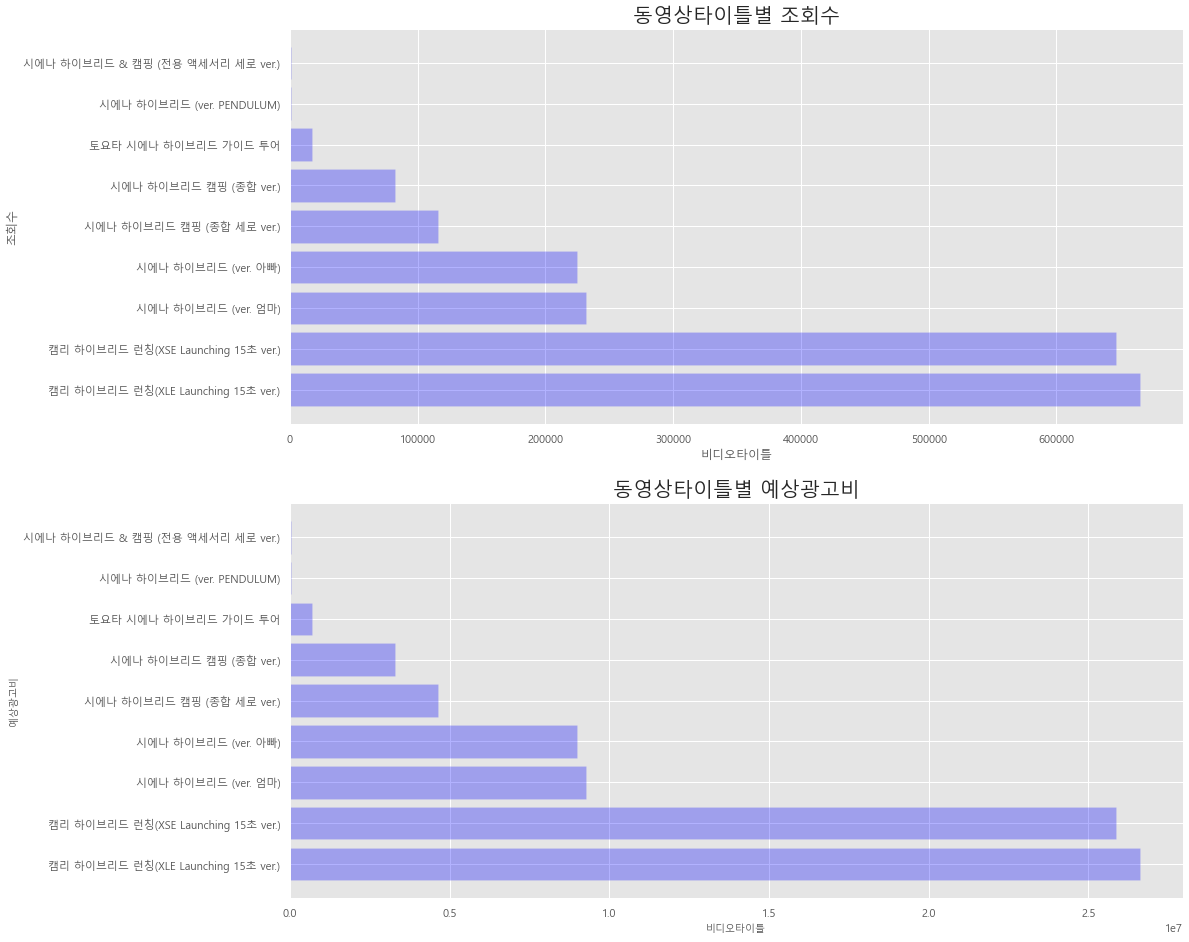

In [107]:
fig = plt.figure(figsize=(16,16))

plt.style.use('ggplot')
plt.subplot(2,1,1)
plt.barh(rlt7[:9]['Video_title'], rlt7[:9]['sum_views'], color='blue', alpha=0.3)
plt.title("동영상타이틀별 조회수",fontsize=20)
plt.xlabel('비디오타이틀')
plt.ylabel('조회수')

plt.subplot(2,1,2)
plt.barh(rlt7[:9]['Video_title'], rlt7[:9]['ex_cost'], color='blue', alpha=0.3)
plt.title("동영상타이틀별 예상광고비",fontsize=20)
plt.xlabel('비디오타이틀', fontsize=10)
plt.ylabel('예상광고비', fontsize=10)

In [115]:
# Brand = TOYOTA

In [207]:
qry8 = """
SELECT
 c.Video_title 
 ,c.Pub_date
 ,c.Channel_genre
 ,c.Brand
 ,c.Timestamp
 ,c.views
 ,(c.views-c.prev_views) as dff_views
 , (c.views-c.prev_views) * 40 as ex_cost
 ,c.likes
 ,(c.likes-c.prev_likes) as dff_likes
 ,c.dislikes
 ,(c.dislikes-c.prev_dislikes) as dff_dislikes
 ,c.comments	 
 ,(c.comments-c.prev_comments) as dff_comments
FROM
 (SELECT
 a.Video_Id
 ,b.Video_title
 ,b.Video_description
 ,b.Pub_date
 ,b.Channel_genre
 ,b.Brand
 ,date(a.Timestamp) as Timestamp
 ,CAST(a.View_counts AS signed integer) as views
 ,LAG(CAST(a.View_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as prev_views
 ,CAST(a.Like_counts AS signed integer) as likes
 ,LAG(CAST(a.Like_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_likes
 ,CAST(a.Dislike_counts AS signed integer) as dislikes
 ,LAG(CAST(a.Dislike_counts AS signed integer) ) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_dislikes
 ,CAST(a.Comment_counts AS signed integer) as comments
 ,LAG(CAST(a.Comment_counts AS signed integer)) 
  OVER(ORDER BY b.Video_title, a.Timestamp ASC) as Prev_comments
FROM Fact_VideoResponse a
LEFT JOIN Dimension_Video3 b
ON a.Video_Id = b.Video_Id
WHERE b.Brand = 'TOYOTA') c
WHERE c.Pub_date > '20201201' and c.Timestamp != '20210605'
ORDER BY Pub_date DESC
"""
cursor.execute(qry8)
rlt8 = cursor.fetchall()

rlt8 = pd.DataFrame(rlt8)

In [208]:
rlt8.tail(1)

,Video_title,Pub_date,Channel_genre,Brand,Timestamp,views,dff_views,ex_cost,likes,dff_likes,dislikes,dff_dislikes,comments,dff_comments
989,시즌 피니쉬! GR Supra with 2020 슈퍼레이스,2020-12-28,Brand,TOYOTA,2021-06-23,651,2,80,18,0,0,0,5,0


In [209]:
# 브랜드별 새로등록된 동영상

In [237]:
last_pub = rlt8["Pub_date"].unique()[0] # 최근게시일 / 토요타는 가장 최근 업로드 시점이 6월4일

In [238]:
last_date = rlt8['Timestamp'].unique()[-1] # 최근날짜  / 토요타채널의 가장 최근 크롤링 시점은 6월23일

In [239]:
# 최근 업로드된 동영상
rlt8[(rlt8["Pub_date"] == last_pub) & (rlt8["Timestamp"] == last_date)][["Video_title", "Pub_date", "views", "likes", "dislikes"]]

,Video_title,Pub_date,views,likes,dislikes
21,시에나 하이브리드 & 캠핑 (RSE 세로 ver.),2021-06-04,137,12,0
43,시에나 하이브리드 & 캠핑 (RSE),2021-06-04,260,11,0
65,시에나 하이브리드 & 캠핑 (전용 액세서리 세로 ver.),2021-06-04,648,17,0
87,시에나 하이브리드 & 캠핑 (전용 액세서리),2021-06-04,257,11,0
109,시에나 하이브리드 & 캠핑 (킥센서&파워백도어 세로 ver.),2021-06-04,160,13,0
131,시에나 하이브리드 & 캠핑 (킥센서&파워백도어),2021-06-04,121,8,0
153,시에나 하이브리드 캠핑 (종합 ver.),2021-06-04,82153,20,0
175,시에나 하이브리드 캠핑 (종합 세로 ver.),2021-06-04,116218,17,2


In [5]:
# 동영상별 일별 조회수 추이

In [219]:
v_titles = rlt8['Video_title'].unique() # 2021년12월1일 이후 등록된 동영상타이틀

In [220]:
v_titles

array(['시에나 하이브리드 & 캠핑 (RSE 세로 ver.)', '시에나 하이브리드 & 캠핑 (RSE)',
       '시에나 하이브리드 & 캠핑 (전용 액세서리 세로 ver.)', '시에나 하이브리드 & 캠핑 (전용 액세서리)',
       '시에나 하이브리드 & 캠핑 (킥센서&파워백도어 세로 ver.)', '시에나 하이브리드 & 캠핑 (킥센서&파워백도어)',
       '시에나 하이브리드 캠핑 (종합 ver.)', '시에나 하이브리드 캠핑 (종합 세로 ver.)',
       '캠리 하이브리드 런칭 (취향저격 시승회_XLE 런칭 15초 ver.)',
       '캠리 하이브리드 런칭 (취향저격 시승회_XSE 런칭 15초 ver.)',
       'GR Supra Racing Class by ATLASBX Motorsports',
       '2021 DREAM CAR ART CONTEST 온라인 시상식', '캠리 하이브리드 시승 1호 고객님 인터뷰',
       '와일드 하이브리드 캠리 런칭쇼', '캠리 하이브리드 런칭(XLE comment 15초 안전사양 ver.)',
       '캠리 하이브리드 런칭(XLE comment 15초 연비 ver.)',
       '캠리 하이브리드 런칭(XLE comment 30초  안전사양 ver.)',
       '캠리 하이브리드 런칭(XLE comment 30초 연비 ver.)',
       '캠리 하이브리드 런칭(XLE Launching 15초 ver.)',
       '캠리 하이브리드 런칭(XLE Launching 30초 ver.)',
       '캠리 하이브리드 런칭(XLE USP 15초 ver.)', '캠리 하이브리드 런칭(XLE USP 30초 ver.)',
       '캠리 하이브리드 런칭(XSE comment 15초 인테리어 ver.)',
       '캠리 하이브리드 런칭(XSE comment 30초 인테리어 ver.)',
       '캠리 하이브리드 런칭(XSE Launc

In [230]:
rlt8[rlt8['Video_title'] == v_titles[13]]

,Video_title,Pub_date,Channel_genre,Brand,Timestamp,views,dff_views,ex_cost,likes,dff_likes,dislikes,dff_dislikes,comments,dff_comments
286,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-06,1039,39,1560,19,3,3,0,0,0
287,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-08,1036,-3,-120,19,0,3,0,0,0
288,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-09,1051,15,600,19,0,3,0,0,0
289,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-10,1083,32,1280,19,0,3,0,0,0
290,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-12,1120,37,1480,19,0,3,0,0,0
291,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-12,1120,0,0,19,0,3,0,0,0
292,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-12,1120,0,0,19,0,3,0,0,0
293,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-13,1133,13,520,19,0,3,0,0,0
294,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-13,1133,0,0,19,0,3,0,0,0
295,와일드 하이브리드 캠리 런칭쇼,2021-05-20,Brand,TOYOTA,2021-06-13,1133,0,0,19,0,3,0,0,0


In [231]:
# 일별조회수 추이
print("타이틀명 : ", v_titles[13])
rlt8[rlt8['Video_title'] == v_titles[13]][["Timestamp", 'views', 'dff_views']] # 첫번째동영상

타이틀명 :  와일드 하이브리드 캠리 런칭쇼


,Timestamp,views,dff_views
286,2021-06-06,1039,39
287,2021-06-08,1036,-3
288,2021-06-09,1051,15
289,2021-06-10,1083,32
290,2021-06-12,1120,37
291,2021-06-12,1120,0
292,2021-06-12,1120,0
293,2021-06-13,1133,13
294,2021-06-13,1133,0
295,2021-06-13,1133,0


In [6]:
# 브랜드동영상별 좋아요,싫어요 반응

### 3. 인플루언서 채널현황

In [7]:
# 연도/기간 별로 '타이틀' 분석 - 단어빈도

In [8]:
# 댓글게재일 기준으로 단어빈도 --> 마케팅키워드를 찾기위해

In [ ]:
# 댓글기준 - 특정브랜드에 대한 긍정/부정 --> 현재 브랜드의 소비자반응을 알기 위해